In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
423,0,3,female,28.0,1,1,14.4000,S,Third,woman,False,NaN,Southampton,no,False
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
327,1,2,female,36.0,0,0,13.0000,S,Second,woman,False,D,Southampton,yes,True
291,1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
632,1,1,male,32.0,0,0,30.5000,C,First,man,True,B,Cherbourg,yes,True
450,0,2,male,36.0,1,2,27.7500,S,Second,man,True,NaN,Southampton,no,False
848,0,2,male,28.0,0,1,33.0000,S,Second,man,True,NaN,Southampton,no,False
703,0,3,male,25.0,0,0,7.7417,Q,Third,man,True,NaN,Queenstown,no,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.shape

(891, 15)

In [7]:
df.isnull().sum()*0.1


survived        0.0
pclass          0.0
sex             0.0
age            17.7
sibsp           0.0
parch           0.0
fare            0.0
embarked        0.2
class           0.0
who             0.0
adult_male      0.0
deck           68.8
embark_town     0.2
alive           0.0
alone           0.0
dtype: float64

In [8]:
cols = [col for col in df.columns if 0 < df[col].isnull().sum() < 0.1*df.shape[0]]
cols

['embarked', 'embark_town']

### 1. Removing rows having less than 5% missing values

In [9]:
df.dropna(subset=cols, inplace=True)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

### 2. Filling Missing values using Mean, Median and Mode

In [11]:
X = df.drop(columns=['survived'])
y = df['survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((711, 14), (178, 14))

In [14]:
X_train.isnull().sum()

pclass           0
sex              0
age            147
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           553
embark_town      0
alive            0
alone            0
dtype: int64

#### First: Finding mean and median

In [15]:
mean_age = X_train['age'].mean()
median_age = X_train['age'].median()


mode_deck = X_train['deck'].mode()[0]

print('Mean of Age:', mean_age)
print('Median of Age:',median_age)
print('Most frequent Deck: ', mode_deck)

Mean of Age: 29.905744680851065
Median of Age: 28.5
Most frequent Deck:  C


### Second: Fill values in Missing Place

In [16]:
X_train['Age_mean'] = X_train['age'].fillna(mean_age)
X_train['Age_Median'] = X_train['age'].fillna(median_age)

X_train['Mode_deck'] = X_train['deck'].fillna(mode_deck)
X_train[['age', 'Age_mean', 'Age_Median', 'deck', 'Mode_deck']].sample(10)

,age,Age_mean,Age_Median,deck,Mode_deck
440,45.0,45.000000,45.0,NaN,C
235,NaN,29.905745,28.5,NaN,C
664,20.0,20.000000,20.0,NaN,C
283,19.0,19.000000,19.0,NaN,C
724,27.0,27.000000,27.0,E,E
445,4.0,4.000000,4.0,A,A
610,39.0,39.000000,39.0,NaN,C
256,NaN,29.905745,28.5,NaN,C
642,2.0,2.000000,2.0,NaN,C
60,22.0,22.000000,22.0,NaN,C


## Visualiaze before and after of Missing Values

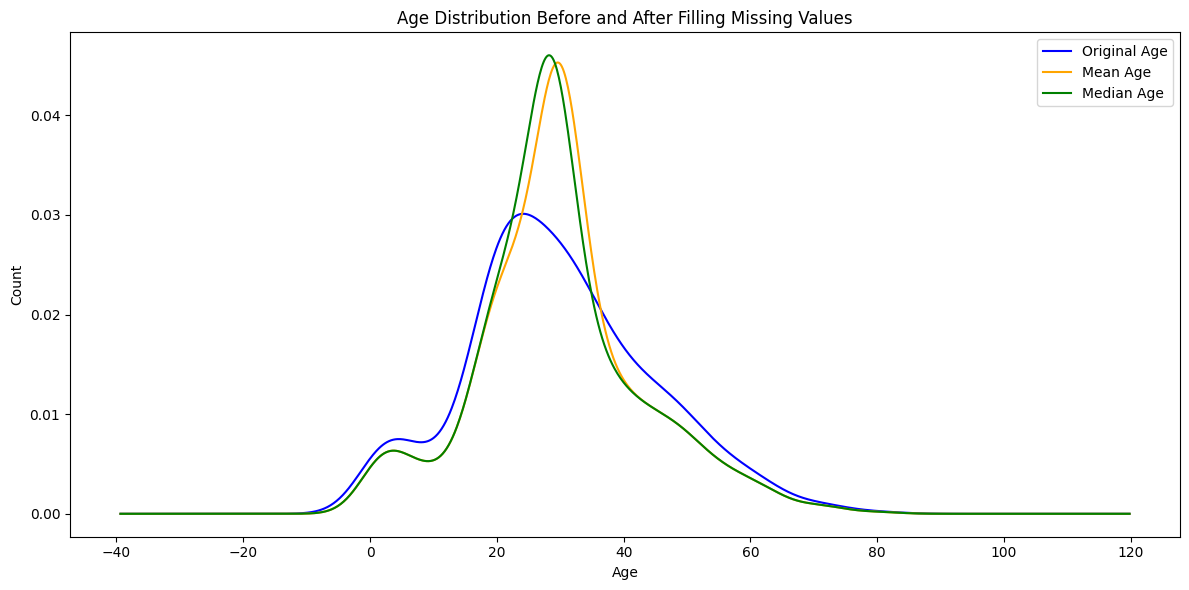

In [103]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Original variable distrubution
X_train['age'].plot(kind='kde', ax=ax, label='Original Age', color='blue')

X_train['Age_mean'].plot(kind='kde', ax=ax, label='Mean Age', color='orange')
X_train['Age_Median'].plot(kind='kde', ax=ax, label='Median Age', color='green')

ax.set_title('Age Distribution Before and After Filling Missing Values')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

Insights: After value filled, it change in the distribution.

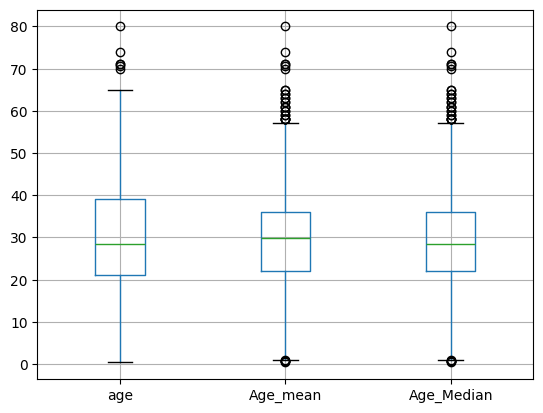

In [21]:
X_train[['age', 'Age_mean', 'Age_Median']].boxplot()
plt.show()

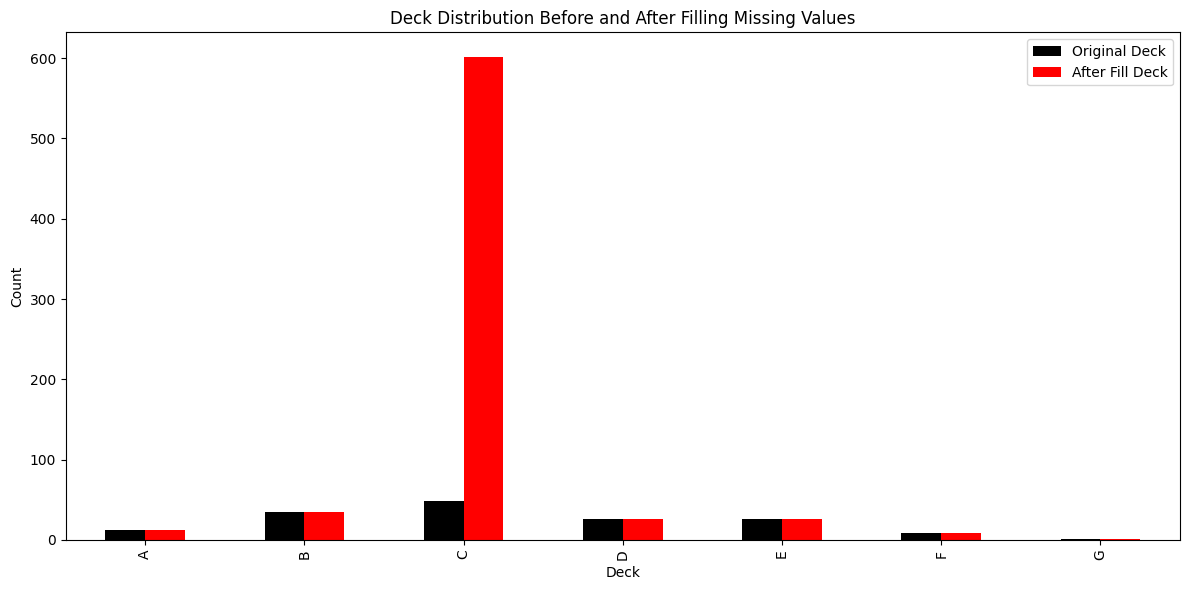

In [17]:
deck_counts = pd.DataFrame({
    'Original Deck': X_train['deck'].value_counts(),
    'After Fill Deck': X_train['Mode_deck'].value_counts()
}).fillna(0)

fig, ax= plt.subplots(figsize=(12, 6))
deck_counts.sort_index().plot(kind='bar', ax=ax, color=['black', 'red'])

ax.set_title('Deck Distribution Before and After Filling Missing Values')
ax.set_xlabel('Deck')
ax.set_ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

### Using Sklearn

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')

In [47]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['age']),
    ('imputer2', imputer2, ['deck'])
], remainder='passthrough')

In [49]:
trf.fit_transform(X_train)

array([[22.0, 'C', 1, ..., 'Southampton', 'yes', True],
       [29.905744680851065, 'C', 3, ..., 'Cherbourg', 'no', False],
       [32.0, 'C', 3, ..., 'Southampton', 'no', True],
       ...,
       [48.0, 'D', 1, ..., 'Southampton', 'yes', True],
       [21.0, 'C', 3, ..., 'Southampton', 'no', False],
       [33.0, 'C', 3, ..., 'Southampton', 'no', True]], dtype=object)

In [41]:
trf.named_transformers_['imputer1'].statistics_

array([29.90574468])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array(['C'], dtype=object)

In [50]:

X_test = trf.transform(X_test)

## Arbitary Value Imputation
It means we give any one value to fill in missing place. e.g., For age: 90 or etc.

In [60]:
X_train['Age_99'] = X_train['age'].fillna(99)
X_train['Deck_missing'] = X_train['deck'].fillna('missing')
X_train[['age', 'Age_99']].sample(10)


TypeError: Cannot setitem on a Categorical with a new category (missing), set the categories first